In [ ]:
Handling Mising Data
  *Loading the dataset
  *Handling missing values
  *Fixing data types
  *Ensuring the data consistency

In [1]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [2]:
import pandas as pd
df=pd.read_csv('dataset.csv')
df.head()

,OrderID,Date,CustomerID,ProductCategory,Quantity,UnitPrice,TotalAmount,DeliveryStatus,PaymentMethod,Rating,Review,Country
0,1000.0,2024-06-12,C008,Electronics,3.0,1203.0,3609.0,Delivered,COD,3.0,"Terrible service, not buying again.",canada
1,1001.0,23-01-2024,C038,Books,1.0,322.0,322.0,Delivered,COD,5.0,NaN,canada
2,1002.0,2024-06-03,C002,Beauty,NaN,2432.0,4864.0,In Transit,COD,4.0,Very good quality and support.,NaN
3,1003.0,2024-03-12,C001,Apparel,4.0,1593.0,6372.0,In Transit,COD,4.0,Excellent packaging and quality.,uk
4,1004.0,2024-01-27,C006,Books,1.0,1670.0,1670.0,In Transit,Credit Card,2.0,Great product and fast delivery!,germany


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          570 non-null    float64
 1   Date             570 non-null    object 
 2   CustomerID       570 non-null    object 
 3   ProductCategory  570 non-null    object 
 4   Quantity         570 non-null    float64
 5   UnitPrice        570 non-null    float64
 6   TotalAmount      570 non-null    float64
 7   DeliveryStatus   570 non-null    object 
 8   PaymentMethod    571 non-null    object 
 9   Rating           570 non-null    float64
 10  Review           570 non-null    object 
 11  Country          571 non-null    object 
dtypes: float64(5), object(7)
memory usage: 56.4+ KB


In [4]:
print("duplicate rows:",df.duplicated().sum())

duplicate rows: 69


In [5]:
df.isnull().sum()

,0
OrderID,30
Date,30
CustomerID,30
ProductCategory,30
Quantity,30
UnitPrice,30
TotalAmount,30
DeliveryStatus,30
PaymentMethod,29
Rating,30


In [10]:
df=df.drop_duplicates()
print("remaining duplicate rows:",df.duplicated().sum())
print("dataset shape after cleaning ;",df.shape)

remaining duplicate rows: 0
dataset shape after cleaning ; (531, 12)


In [12]:
df.dtypes

,0
OrderID,float64
Date,object
CustomerID,object
ProductCategory,object
Quantity,float64
UnitPrice,float64
TotalAmount,float64
DeliveryStatus,object
PaymentMethod,object
Rating,float64


In [15]:
df['Date']=pd.to_datetime(df['Date'],errors='coerce')
df['Date'].head()

,Date
0,2024-06-12
1,NaT
2,2024-06-03
3,2024-03-12
4,2024-01-27


In [21]:
df['Total_calc'] =df['Quantity']*df['UnitPrice']
inconsistent = df[df['TotalAmount'].round(2) != df['Total_calc'].round(2)]
print("rows with inconsistent TotalAmount:",inconsistent.shape[0])
inconsistent.head()

rows with inconsistent TotalAmount: 85


,OrderID,Date,CustomerID,ProductCategory,Quantity,UnitPrice,TotalAmount,DeliveryStatus,PaymentMethod,Rating,Review,Country,Total_calc
2,1002.0,2024-06-03,C002,Beauty,NaN,2432.0,4864.0,In Transit,COD,4.0,Very good quality and support.,NaN,NaN
9,1009.0,2024-06-12,C045,Beauty,2.0,NaN,3056.0,Delivered,COD,4.0,Great product and fast delivery!,NaN,NaN
14,1014.0,2024-05-15,C017,NaN,1.0,669.0,NaN,Returned,Credit Card,NaN,Loved it! Highly recommended.,india,669.0
15,1015.0,2024-03-16,C028,Apparel,NaN,NaN,852.0,Returned,Credit Card,2.0,"Product was damaged, returned.",NaN,NaN
24,1024.0,2024-04-14,C013,Electronics,1.0,1965.0,NaN,In Transit,Debit Card,3.0,Worst delivery experience.,germany,1965.0


In [24]:
df.loc[df['TotalAmount'].round(2) !=df['Total_calc'].round(2), 'TotalAmount'] =df['Total_calc']

In [25]:
df = df.drop(columns=['Total_calc'])


In [26]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 531 entries, 0 to 599
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderID          501 non-null    float64       
 1   Date             482 non-null    datetime64[ns]
 2   CustomerID       501 non-null    object        
 3   ProductCategory  502 non-null    object        
 4   Quantity         501 non-null    float64       
 5   UnitPrice        502 non-null    float64       
 6   TotalAmount      475 non-null    float64       
 7   DeliveryStatus   502 non-null    object        
 8   PaymentMethod    502 non-null    object        
 9   Rating           501 non-null    float64       
 10  Review           502 non-null    object        
 11  Country          502 non-null    object        
dtypes: datetime64[ns](1), float64(5), object(6)
memory usage: 70.1+ KB


,OrderID,Date,Quantity,UnitPrice,TotalAmount,Rating
count,501.000000,482,501.000000,502.000000,475.000000,501.000000
mean,1151.233533,2024-04-11 00:32:51.784232192,2.990020,1377.553785,4115.543158,3.231537
min,1000.000000,2024-01-01 00:00:00,1.000000,201.000000,237.000000,1.000000
25%,1073.000000,2024-03-06 12:00:00,2.000000,803.000000,1728.000000,2.000000
50%,1154.000000,2024-04-13 00:00:00,3.000000,1383.500000,3432.000000,3.000000
75%,1228.000000,2024-05-21 00:00:00,4.000000,1980.500000,5840.000000,4.000000
max,1299.000000,2024-06-29 00:00:00,5.000000,2499.000000,12440.000000,5.000000
std,87.636564,NaN,1.402106,673.996745,2944.801920,1.225677


In [27]:
df['DeliveryStatus'].value_counts()
df['PaymentMethod'].value_counts()
df['Country'].value_counts()

,count
Country,
germany,127
canada,99
usa,94
uk,79
india,79
CANADA,7
GERMANY,6
INDIA,5
UK,3


DataTransformation & Standardization

In [28]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric columns:", numeric_cols)

Numeric columns: ['OrderID', 'Quantity', 'UnitPrice', 'TotalAmount', 'Rating']


In [29]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['CustomerID', 'ProductCategory', 'DeliveryStatus', 'PaymentMethod', 'Review', 'Country']


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [40]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)

df_encoded = pd.get_dummies(df_scaled, columns=categorical_cols, drop_first=True)
df_encoded.head()

Categorical columns: ['CustomerID', 'ProductCategory', 'DeliveryStatus', 'PaymentMethod', 'Review', 'Country']


,OrderID,Date,Quantity,UnitPrice,TotalAmount,Rating,CustomerID_C002,CustomerID_C003,CustomerID_C004,CustomerID_C005,...,Country_GERMANY,Country_INDIA,Country_NAN,Country_UK,Country_USA,Country_canada,Country_germany,Country_india,Country_uk,Country_usa
0,-1.727415,2024-06-12,0.007125,-0.259241,-0.172194,-0.189094,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,-1.715993,NaT,-1.420727,-1.567673,-1.289575,1.444288,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,-1.704570,2024-06-03,NaN,1.566028,NaN,0.627597,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-1.693148,2024-03-12,0.721051,0.319974,0.767059,0.627597,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,-1.681726,2024-01-27,-1.420727,0.434331,-0.831337,-1.005785,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [41]:
print("Original dataset shape:", df.shape)
print("Transformed dataset shape:", df_encoded.shape)

Original dataset shape: (531, 12)
Transformed dataset shape: (531, 93)


Exploratory Data Analysis

In [42]:
print(df.head())


    OrderID       Date CustomerID ProductCategory  Quantity  UnitPrice  \
0 -1.727415 2024-06-12       C008     Electronics  0.007125  -0.259241   
1 -1.715993        NaT       C038           Books -1.420727  -1.567673   
2 -1.704570 2024-06-03       C002          Beauty       NaN   1.566028   
3 -1.693148 2024-03-12       C001         Apparel  0.721051   0.319974   
4 -1.681726 2024-01-27       C006           Books -1.420727   0.434331   

   TotalAmount DeliveryStatus PaymentMethod    Rating  \
0    -0.172194      Delivered           COD -0.189094   
1    -1.289575      Delivered           COD  1.444288   
2          NaN     In Transit           COD  0.627597   
3     0.767059     In Transit           COD  0.627597   
4    -0.831337     In Transit   Credit Card -1.005785   

                                Review  Country  
0  Terrible service, not buying again.   canada  
1                                  NaN   canada  
2       Very good quality and support.      NaN  
3     Excell

In [43]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 531 entries, 0 to 599
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderID          501 non-null    float64       
 1   Date             482 non-null    datetime64[ns]
 2   CustomerID       501 non-null    object        
 3   ProductCategory  502 non-null    object        
 4   Quantity         501 non-null    float64       
 5   UnitPrice        502 non-null    float64       
 6   TotalAmount      475 non-null    float64       
 7   DeliveryStatus   502 non-null    object        
 8   PaymentMethod    502 non-null    object        
 9   Rating           501 non-null    float64       
 10  Review           502 non-null    object        
 11  Country          502 non-null    object        
dtypes: datetime64[ns](1), float64(5), object(6)
memory usage: 70.1+ KB
None


In [44]:
print(df.describe())


            OrderID                           Date      Quantity  \
count  5.010000e+02                            482  5.010000e+02   
mean  -8.509494e-17  2024-04-11 00:32:51.784232192  6.027558e-17   
min   -1.727415e+00            2024-01-01 00:00:00 -1.420727e+00   
25%   -8.935965e-01            2024-03-06 12:00:00 -7.068009e-01   
50%    3.159905e-02            2024-04-13 00:00:00  7.125009e-03   
75%    8.768394e-01            2024-05-21 00:00:00  7.210509e-01   
max    1.687813e+00            2024-06-29 00:00:00  1.434977e+00   
std    1.001000e+00                            NaN  1.001000e+00   

          UnitPrice   TotalAmount        Rating  
count  5.020000e+02  4.750000e+02  5.010000e+02  
mean   1.061568e-16  1.570673e-16  5.495715e-17  
min   -1.747378e+00 -1.318470e+00 -1.822477e+00  
25%   -8.533081e-01 -8.116201e-01 -1.005785e+00  
50%    8.831121e-03 -2.323633e-01 -1.890942e-01  
75%    8.954756e-01  5.862109e-01  6.275971e-01  
max    1.665535e+00  2.829811e+00  1.

In [45]:
import matplotlib.pyplot as plt

Histograms

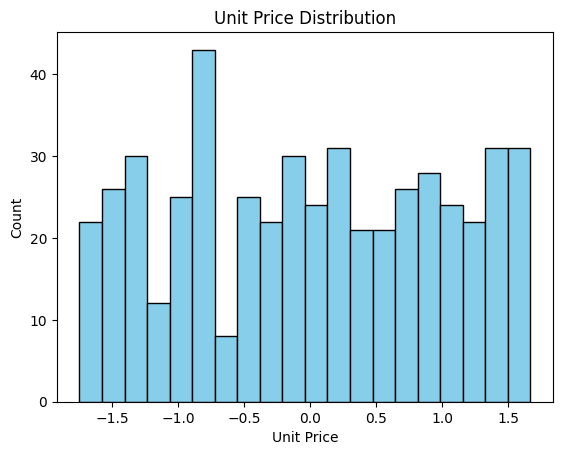

In [46]:
plt.hist(df['UnitPrice'], bins=20, color='skyblue', edgecolor='black')
plt.title('Unit Price Distribution')
plt.xlabel('Unit Price')
plt.ylabel('Count')
plt.show()

Boxplot

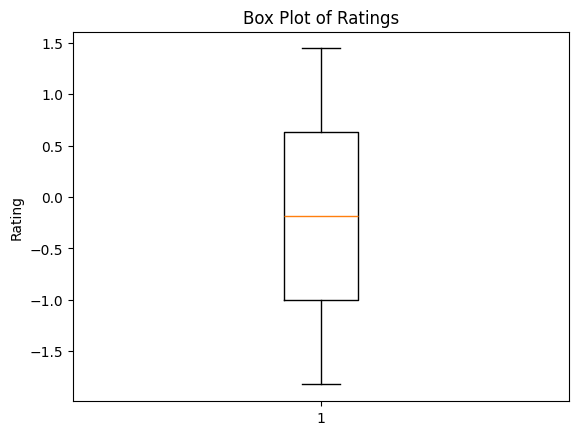

In [48]:
plt.boxplot(df['Rating'].dropna())
plt.title('Box Plot of Ratings')
plt.ylabel('Rating')
plt.show()

In [49]:
print(df.corr(numeric_only=True))


              OrderID  Quantity  UnitPrice  TotalAmount    Rating
OrderID      1.000000 -0.010332   0.088491     0.031573  0.075450
Quantity    -0.010332  1.000000  -0.017734     0.632529 -0.070207
UnitPrice    0.088491 -0.017734   1.000000     0.688588 -0.006956
TotalAmount  0.031573  0.632529   0.688588     1.000000 -0.048821
Rating       0.075450 -0.070207  -0.006956    -0.048821  1.000000


Scatter Plot (Relationship Between Two Columns)

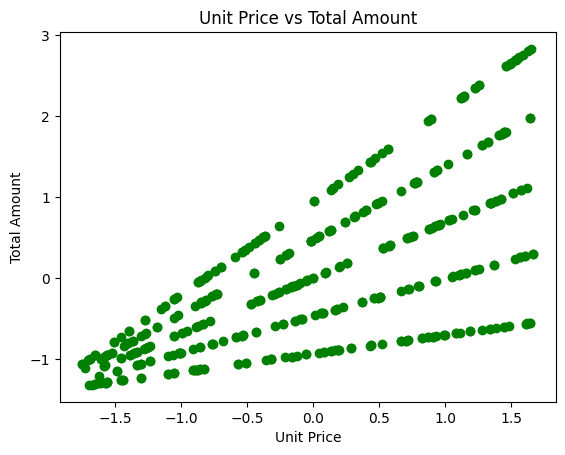

In [50]:
plt.scatter(df['UnitPrice'], df['TotalAmount'], color='green')
plt.title('Unit Price vs Total Amount')
plt.xlabel('Unit Price')
plt.ylabel('Total Amount')
plt.show()

In [51]:
top_categories = df.groupby('ProductCategory')['TotalAmount'].sum().sort_values(ascending=False).head(5)
print(top_categories)


ProductCategory
Home Decor     14.369007
Electronics    13.150286
Beauty         -1.721414
Apparel        -3.146071
Books         -24.109086
Name: TotalAmount, dtype: float64


Interactive Dashboard

In [52]:
!pip install plotly


In [53]:
import plotly.express as px


In [54]:
category_sales = df.groupby('ProductCategory')['TotalAmount'].sum().reset_index()


Interactive Bar Chart — Top Selling Product Categories

In [55]:
fig = px.bar(category_sales.sort_values('TotalAmount', ascending=False).head(10),
             x='ProductCategory', y='TotalAmount',
             title='Top 10 Product Categories by Total Sales',
             color='TotalAmount',
             color_continuous_scale='Blues')
fig.show()

Interactive Pie Chart — Payment Methods

In [57]:
payment_counts = df['PaymentMethod'].value_counts().reset_index()
payment_counts.columns = ['PaymentMethod', 'Count']


fig = px.pie(payment_counts, values='Count', names='PaymentMethod',
             title='Payment Method Distribution', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()



Interactive Bar Chart[STACKED] — Delivery Status by Country

In [59]:
delivery_data = df.groupby(['Country', 'DeliveryStatus']).size().reset_index(name='Count')
fig = px.bar(delivery_data, x='Country', y='Count', color='DeliveryStatus',
             title='Delivery Status by Country',
             barmode='stack')
fig.show()


Interactive Scatter — Rating vs TotalAmount

In [61]:
fig = px.scatter(df, x='Rating', y='TotalAmount',
                 color='ProductCategory',
                 title='Customer Rating vs Total Purchase Amount',
                 hover_data=['PaymentMethod', 'Country'])
fig.show()